In [9]:
source("http://bioconductor.org/biocLite.R")
biocLite("goseq")
biocLite("edgeR")
biocLite("org.Hs.eg.db")

Bioconductor version 3.2 (BiocInstaller 1.20.3), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.3), R 3.2.3 (2015-12-10).
Installing package(s) 'goseq'


package 'goseq' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ali\AppData\Local\Temp\RtmpoF3iLN\downloaded_packages


Old packages: 'acepack', 'apcluster', 'ape', 'colorspace', 'crayon', 'curl',
  'DBI', 'devtools', 'doParallel', 'evaluate', 'Formula', 'futile.logger',
  'ggplot2', 'git2r', 'gridExtra', 'Hmisc', 'htmltools', 'htmlwidgets', 'httr',
  'igraph', 'irlba', 'jsonlite', 'lambda.r', 'memoise', 'NLP', 'openssl',
  'pbdZMQ', 'plyr', 'R6', 'Rcpp', 'RcppArmadillo', 'reshape2', 'rJava',
  'RSQLite', 'rstudioapi', 'scales', 'snow', 'statmod', 'statnet.common',
  'stringi', 'stringr', 'visNetwork', 'withr', 'wordnet', 'XML', 'boot',
  'cluster', 'codetools', 'foreign', 'lattice', 'MASS', 'Matrix', 'mgcv',
  'nlme', 'nnet', 'rpart', 'survival'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.3), R 3.2.3 (2015-12-10).
Installing package(s) 'edgeR'
also installing the dependency 'limma'



package 'limma' successfully unpacked and MD5 sums checked
package 'edgeR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ali\AppData\Local\Temp\RtmpoF3iLN\downloaded_packages


Old packages: 'acepack', 'apcluster', 'ape', 'colorspace', 'crayon', 'curl',
  'DBI', 'devtools', 'doParallel', 'evaluate', 'Formula', 'futile.logger',
  'ggplot2', 'git2r', 'gridExtra', 'Hmisc', 'htmltools', 'htmlwidgets', 'httr',
  'igraph', 'irlba', 'jsonlite', 'lambda.r', 'memoise', 'NLP', 'openssl',
  'pbdZMQ', 'plyr', 'R6', 'Rcpp', 'RcppArmadillo', 'reshape2', 'rJava',
  'RSQLite', 'rstudioapi', 'scales', 'snow', 'statmod', 'statnet.common',
  'stringi', 'stringr', 'visNetwork', 'withr', 'wordnet', 'XML', 'boot',
  'cluster', 'codetools', 'foreign', 'lattice', 'MASS', 'Matrix', 'mgcv',
  'nlme', 'nnet', 'rpart', 'survival'


In [ ]:
setwd('~/bme/jupyter_data/')
library(goseq)

First I look for any enriched GO terms in genes that have intron retention events. Genes are determined to have IR events according to mark_intron_retention.py, which compares all consensus isoforms for a gene and checks if any isoform has an exon that nearly completely spans another isoforms' intron. Next I look for enriched GO terms in genes that have intron retention events and are more highly expressed in the wildtype.

ENSG00000102054 ENSG00000124208 ENSG00000269899 ENSG00000167699 ENSG00000274888 
              0               0               0               0               0 
ENSG00000106554 
              0

Loading hg19 length data...
Fetching GO annotations...
Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading require

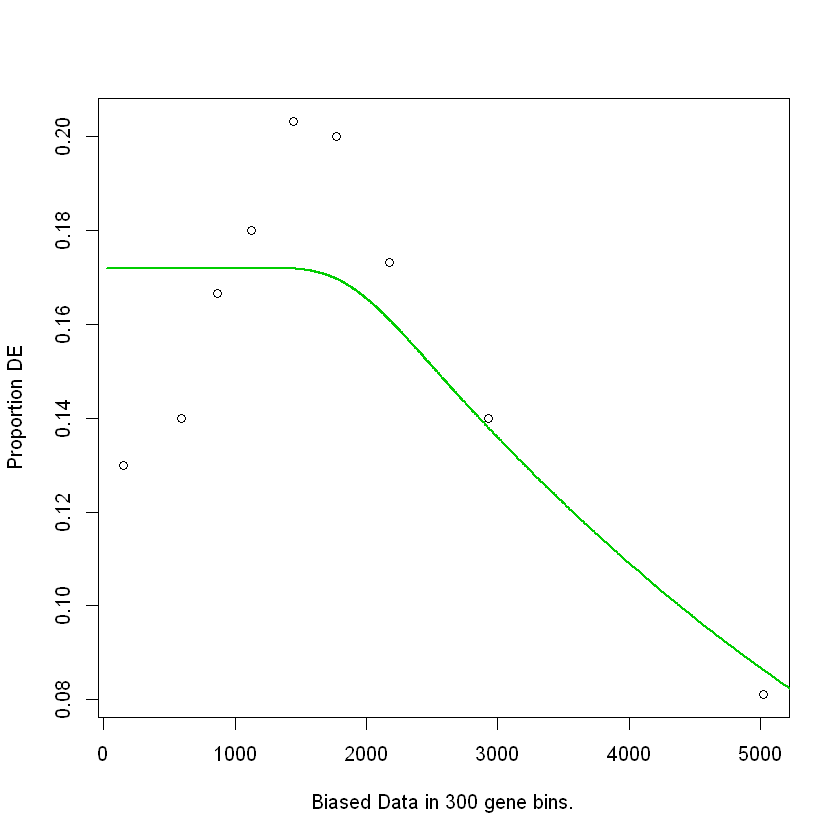

In [16]:
info = read.table('ir_goseq_bool.txt')  # intron retetion calls present/absent per gene
genes = info$V2
names(genes) = info$V1
head(genes)

pwf = nullp(genes, 'hg19', 'ensGene')  # it has to fetch gene lengths to fit the probability weighting function
res = goseq(pwf, 'hg19', 'ensGene', method='Hypergeometric')   # no length bias of long reads for genes

In [17]:
head(res)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
1693,GO:0006405,9.426504e-05,0.9999832,13,26,RNA export from nucleus,BP
7982,GO:0051592,1.983706e-04,0.9999770,9,15,response to calcium ion,BP
8922,GO:0071166,4.573343e-04,0.9999057,12,26,ribonucleoprotein complex localization,BP
9016,GO:0071426,4.573343e-04,0.9999057,12,26,ribonucleoprotein complex export from nucleus,BP
1694,GO:0006406,5.446785e-04,0.9998956,11,23,mRNA export from nucleus,BP
9017,GO:0071427,5.446785e-04,0.9998956,11,23,mRNA-containing ribonucleoprotein complex export from nucleus,BP


ENSG00000172349 ENSG00000261471 ENSG00000279641 ENSG00000252549 ENSG00000131051 
              1               0               1               1               1 
ENSG00000164548 
              1

Loading hg19 length data...
Fetching GO annotations...
For 125 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
2028,GO:0032482,0.04196669,1.0000000,4,4,Rab protein signal transduction,BP
1738,GO:0030139,0.05041309,0.9910881,7,9,endocytic vesicle,CC
855,GO:0006979,0.07083739,0.9916662,5,6,response to oxidative stress,BP
2219,GO:0034341,0.07083739,0.9916662,5,6,response to interferon-gamma,BP
2837,GO:0045335,0.07083739,0.9916662,5,6,phagocytic vesicle,CC
3484,GO:0060333,0.07083739,0.9916662,5,6,interferon-gamma-mediated signaling pathway,BP


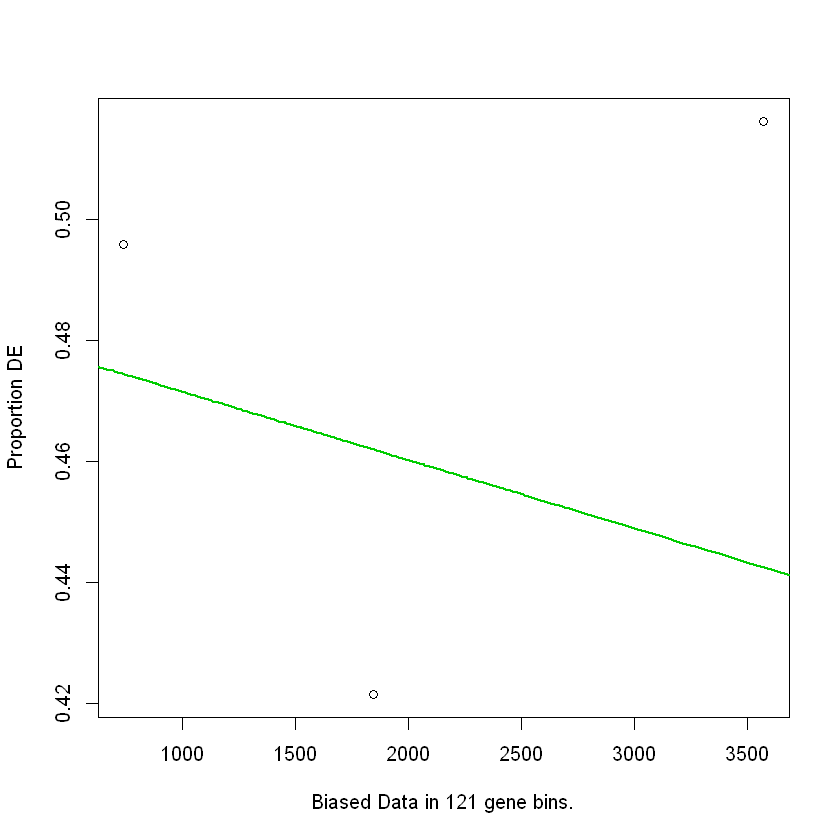

In [18]:
info = read.table('ir_goseq_wt.txt')  # for intron retention events that are/are not more highly expressed in the wt

genes = info$V2
names(genes) = info$V1
head(genes)

pwf = nullp(genes, 'hg19', 'ensGene')  # it has to fetch gene lengths to fit the probability weighting function
res = goseq(pwf, 'hg19', 'ensGene', method='Hypergeometric')   # no length bias of long reads for genes

head(res)